# COMSE6998_015 Project Results Analysis

In [1]:
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:

# Reading the JSON file
game24_bfs = "logs/game24/gpt-4o_0.7_propose1_value3_greedy3_start900_end915_bfs.json"
game24_dfs = "logs/game24/gpt-3.5-turbo_0.7_propose1_value3_greedy3_start900_end915_dfs_1.json"

sudoku_bfs = "logs/sudoku/gpt-4o_0.7_propose1_value3_greedy3_start0_end15_bfs.json"
sudoku_dfs = "logs/sudoku/gpt-4o_0.7_propose1_value3_greedy3_start0_end15_dfs_1.json"

with open(sudoku_bfs, "r") as file:
    sudoku_results_bfs = json.load(file)

with open(sudoku_dfs, "r") as file:
    sudoku_results_dfs = json.load(file)

with open(game24_bfs, "r") as file:
    game24_results_bfs = json.load(file)

with open(game24_dfs, "r") as file:
    game24_results_dfs = json.load(file)

In [67]:
def calculate_results(results):
    results_df = pd.DataFrame(results)
    results_df["completion_tokens"] = results_df["usage_so_far"].apply(lambda x: x["completion_tokens"])
    results_df["prompt_tokens"] = results_df["usage_so_far"].apply(lambda x: x["prompt_tokens"])
    results_df["cost"] = results_df["usage_so_far"].apply(lambda x: x["cost"])
    results_df.drop(["steps", "ys", "infos", "cnt_avg", "usage_so_far"], axis=1, inplace=True)
    results_df = results_df[[
        'idx', 
        'generate_time', 
        'evaluate_time', 
        'total_time', 
        'num_of_generations',
        'num_of_evaluations', 
        'num_of_steps', 
        "sum(accs)",
        'cnt_any',
        'completion_tokens', 
        'prompt_tokens', 
        'cost'
    ]]
    return results_df

In [68]:
game24_results_df_bfs = calculate_results(game24_results_bfs)

game24_results_df_dfs = calculate_results(game24_results_dfs)

sudoku_results_df_bfs = calculate_results(sudoku_results_bfs)

sudoku_results_df_dfs = calculate_results(sudoku_results_dfs)

In [69]:
print("game24 BFS: ")
display(game24_results_df_bfs)
print("game24 DFS: ")
display(game24_results_df_dfs)
print("sudoku BFS: ")
display(sudoku_results_df_bfs)
print("sudoku DFS: ")
display(sudoku_results_df_dfs)

game24 BFS: 


,idx,generate_time,evaluate_time,total_time,num_of_generations,num_of_evaluations,num_of_steps,sum(accs),cnt_any,completion_tokens,prompt_tokens,cost
0,900,19.169435,218.577358,237.756273,10,73,4,1,1,40607,25949,0.470942
1,901,15.908434,116.913925,132.829154,10,65,4,1,2,61906,43788,0.728530
2,902,16.541463,203.775437,220.397625,10,71,4,0,2,97132,68367,1.142238
3,903,15.891381,122.586523,138.507317,10,63,4,3,3,121346,86045,1.428573
4,904,21.412459,256.810851,278.235890,10,87,4,0,3,169585,112927,1.978168
5,905,18.756324,148.941584,167.705392,10,73,4,1,4,193978,132277,2.270472
6,906,17.567101,109.185390,126.758665,10,73,4,0,4,214988,148683,2.521587
7,907,14.828298,127.878560,142.714245,10,68,4,1,5,238730,166046,2.802415
8,908,13.543483,76.183673,89.745272,10,63,4,0,5,253263,177101,2.975383
9,909,21.791507,134.648719,156.444945,10,68,4,3,6,278173,196653,3.273363


game24 DFS: 


,idx,generate_time,evaluate_time,total_time,num_of_generations,num_of_evaluations,num_of_steps,sum(accs),cnt_any,completion_tokens,prompt_tokens,cost
0,900,14.795482,42.254491,57.051499,15,15,4,0,0,3416,25582,0.017915
1,901,20.546261,41.919276,62.467192,18,18,4,0,0,7333,53882,0.037941
2,902,12.867640,25.424237,38.337074,8,8,4,1,1,9970,71019,0.050464
3,903,8.534215,26.132104,34.669357,9,9,4,1,2,12498,86544,0.062019
4,904,29.745538,63.228737,92.978777,19,19,4,0,2,20739,121799,0.092008
5,905,9.615753,25.673711,35.294998,10,10,4,0,2,23036,140048,0.104578
6,906,17.524487,44.162100,61.688397,18,18,4,0,2,26895,170129,0.125407
7,907,20.658715,62.259616,82.919600,18,18,4,0,2,32444,207283,0.152307
8,908,17.697683,44.150538,61.850353,18,18,4,0,2,36393,238565,0.173872
9,909,14.324925,43.219678,57.545834,16,16,4,0,2,39201,262234,0.189919


sudoku BFS: 


,idx,generate_time,evaluate_time,total_time,num_of_generations,num_of_evaluations,num_of_steps,sum(accs),cnt_any,completion_tokens,prompt_tokens,cost
0,0,34.287573,92.545479,126.840389,16,62,6,3,1,14021,47384,0.258670
1,1,26.272192,82.198555,108.477617,16,54,6,3,2,24122,84825,0.453283
2,2,13.169880,22.875111,36.045449,10,22,4,3,3,27116,98749,0.518033
3,3,10.991992,18.187337,29.180353,10,22,4,3,4,29643,109051,0.569057
4,4,20.584021,62.564793,83.150321,13,38,5,3,5,37864,135142,0.716495
5,5,26.528521,63.177608,89.707470,16,50,6,3,6,46919,169255,0.892327
6,6,21.238158,42.543909,63.783316,13,36,5,3,7,52874,190946,1.006105
7,7,18.900558,28.708081,47.609310,13,35,5,3,8,57372,207652,1.092850
8,8,34.065244,90.446196,124.516089,19,73,7,3,9,69514,242004,1.300150
9,9,33.151959,89.838163,122.992779,19,77,7,3,10,81218,289850,1.536805


sudoku DFS: 


,idx,generate_time,evaluate_time,total_time,num_of_generations,num_of_evaluations,num_of_steps,sum(accs),cnt_any,completion_tokens,prompt_tokens,cost
0,0,12.658469,32.817263,45.476744,6,6,6,1,1,5896,20536,0.110300
1,1,11.195590,31.051593,42.247602,6,6,6,1,2,11734,38575,0.213778
2,2,1.482440,4.467481,5.949987,1,1,4,0,2,12517,42088,0.230390
3,3,4.851834,11.652154,16.504286,4,4,4,1,3,14635,50644,0.272960
4,4,6.441679,21.731528,28.174498,5,5,5,1,4,18489,63533,0.343723
5,5,11.611382,43.066348,54.678922,6,6,6,1,5,26040,87341,0.478753
6,6,5.835526,21.767374,27.603231,5,5,5,1,6,29793,100241,0.548533
7,7,6.838835,18.526231,25.365506,5,5,5,1,7,33300,113966,0.617915
8,8,11.719504,46.254651,57.979130,7,7,7,1,8,41425,142111,0.769527
9,9,2.938969,17.651383,20.590529,2,2,7,0,8,43600,151566,0.814915


In [90]:
# Aggregation
runs = {
    "game24_bfs": game24_results_df_bfs, 
    "game24_dfs": game24_results_df_dfs, 
    "sudoku_bfs": sudoku_results_df_bfs, 
    "sudoku_dfs": sudoku_results_df_dfs, 
}
metrics_df_lst = []
for run_name, run_df in runs.items():
    metrics_df_lst.append(
        {
            "game": run_name.split("_")[0], 
            "search_method": run_name.split("_")[1], 
            "total_time": sum(run_df["total_time"]), 
            "total_num_of_examples": len(run_df), 
            #"avg_total_time": sum(run_df["total_time"]) / len(run_df), 
            "total_generate_time": sum(run_df["generate_time"]), 
            "total_num_of_generations": sum(run_df["num_of_generations"]), 
            #"avg_generate_time": sum(run_df["generate_time"]) / sum(run_df["num_of_generations"]), 
            "total_evaluate_time": sum(run_df["evaluate_time"]), 
            "total_num_of_evaluations": sum(run_df["num_of_evaluations"]), 
            #"avg_evaluate_time": sum(run_df["evaluate_time"]) / sum(run_df["num_of_evaluations"]), 
            #"total_num_of_steps": sum(run_df["num_of_steps"]), 
            #"avg_num_of_steps": sum(run_df["num_of_steps"]) / len(run_df), 
            "num_solved": len(run_df[run_df["sum(accs)"] != 0]), 
            "accuracy": len(run_df[run_df["sum(accs)"] != 0]) / len(run_df), 
            "completion_tokens": sum(run_df["completion_tokens"]), 
            "prompt_tokens": sum(run_df["prompt_tokens"]), 
            #"est_cost": sum(run_df["cost"]), 
        }
    )

metrics_df = pd.DataFrame(metrics_df_lst)

In [91]:
# Final Results for all experiment runs
display(metrics_df)

,game,search_method,total_time,total_num_of_examples,total_generate_time,total_num_of_generations,total_evaluate_time,total_num_of_evaluations,num_solved,accuracy,completion_tokens,prompt_tokens
0,game24,bfs,2339.917595,15,265.938921,150,2073.618848,1043,7,0.466667,3390651,2365702
1,game24,dfs,853.487340,15,250.249587,220,603.137237,220,3,0.200000,464447,3082108
2,sudoku,bfs,1841.070503,15,475.461434,255,1365.296365,962,15,1.000000,1145762,3901094
3,sudoku,dfs,991.801223,15,214.647961,119,777.117020,119,13,0.866667,738745,2487801


In [75]:
metrics_df.to_csv("final_metrics_df.csv", index=False)

In [95]:
col_order = ["total_time", "total_generate_time", "total_evaluate_time", "total_num_of_generations", "total_num_of_evaluations"]
names = ["Total Time", "Gen Time", "Eval Time", "Num of Gen", "Num of Eval"]
metrics_df = metrics_df[col_order]
metrics_df

,total_time,total_generate_time,total_evaluate_time,total_num_of_generations,total_num_of_evaluations
0,2339.917595,265.938921,2073.618848,150,1043
1,853.487340,250.249587,603.137237,220,220
2,1841.070503,475.461434,1365.296365,255,962
3,991.801223,214.647961,777.117020,119,119


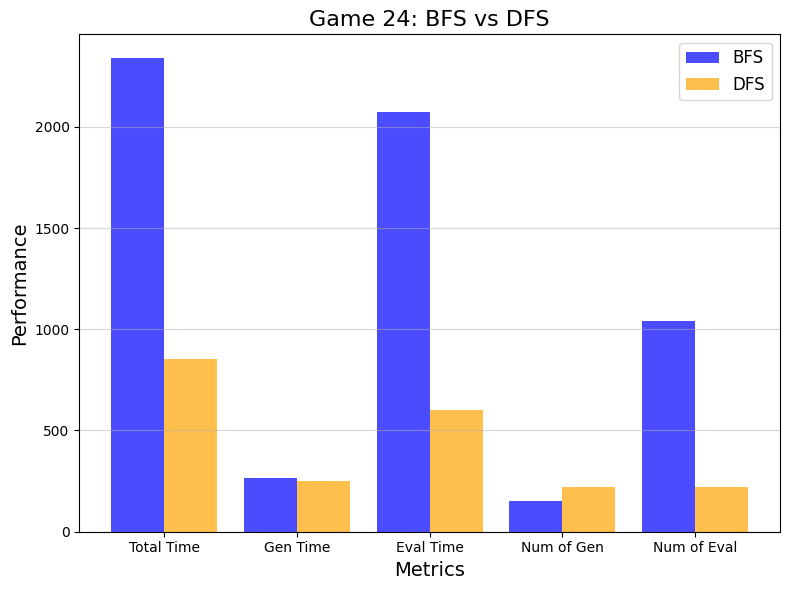

In [96]:
# Select the rows to compare
game24_bfs = metrics_df.loc[0]
game24_dfs = metrics_df.loc[1]

# Create the histogram
x = np.arange(len(metrics_df.columns))  # positions for columns
width = 0.4  # width of bars

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, game24_bfs, width=width, label='BFS', color='blue', alpha=0.7)
plt.bar(x + width/2, game24_dfs, width=width, label='DFS', color='orange', alpha=0.7)

# Add labels, title, and legend
plt.xticks(x, names)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Performance', fontsize=14)
plt.title('Game 24: BFS vs DFS', fontsize=16)
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


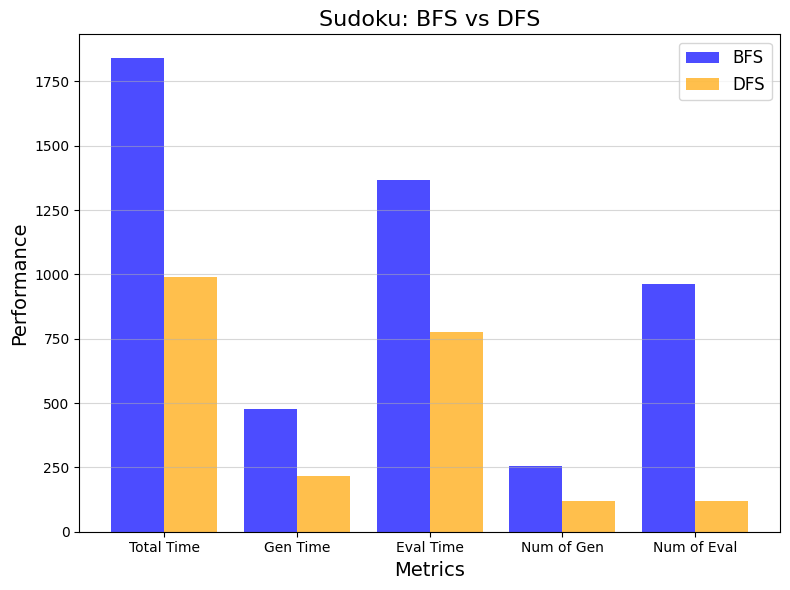

In [97]:
# Select the rows to compare
sudoku_bfs = metrics_df.loc[2]
sudoku_dfs = metrics_df.loc[3]

# Create the histogram
x = np.arange(len(metrics_df.columns))  # positions for columns
width = 0.4  # width of bars

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, sudoku_bfs, width=width, label='BFS', color='blue', alpha=0.7)
plt.bar(x + width/2, sudoku_dfs, width=width, label='DFS', color='orange', alpha=0.7)

# Add labels, title, and legend
plt.xticks(x, names)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Performance', fontsize=14)
plt.title('Sudoku: BFS vs DFS', fontsize=16)
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()
